# Importieren von Bibliotheken

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
np.set_printoptions(suppress=True)
import folium
import geopandas as gpd
%matplotlib inline

## Daten Hochladen

In [22]:
data_ = pd.read_csv('King_County_House_prices_dataset.csv')
state_geo='/Users/younesiferd/Desktop/data/us-zip-code-latitude-and-longitude.geojson'
geo_data= gpd.read_file(state_geo)[["zip","city"]]
geo_data['zip'] = geo_data.zip.astype(int)
data=pd.merge(data_,geo_data, how='left', left_on="zipcode", right_on="zip")

In [23]:
#geo_data.info()

# Daten aufbereiten

In [24]:
#data.groupby('yr_renovated').count()

In [25]:
np.set_printoptions(suppress=True)


In [26]:
#data['yr_renovated']=data.waterfront.astype('datetime64[ns]')
data['waterfront']=data.waterfront.astype('category')
data['view']=data.view.astype('category')
data['condition']=data.condition.astype('category')
data['grade']=data.grade.astype('category')
def f1(x):
    if x==0:
        return 'No'
    else:
        return 'Yes'
def f2(x):
    if x==0:
        return 'very bad'
    elif x==1:
        return 'bad'
    elif x==2:
        return 'medium'
    elif x==3:
        return 'good'
    elif x==4:
        return "very good"
def f3(x):
    if x==1:
        return 'very bad'
    elif x==2:
        return 'bad'
    elif x==3:
        return 'medium'
    elif x==4:
        return 'good'
    elif x==5:
        return "very good"
    
def f4(x):
    if x==3:
        return 'very bad'
    elif x>3 and x<=6:
        return 'bad'
    elif x>6 and x<=10:
        return 'medium'
    elif x>10:
        return 'good'
data['waterfront_category']=data['waterfront'].apply(f1)
data['view_category']=data['view'].apply(f2)
data['condition_category']=data['condition'].apply(f3)
data['grade_category']=data['grade'].apply(f4)
#data.info( )


## count missing in the data

In [27]:
data_missing= data.isna()
#data_missing.sum()
#data_missing.sum()/len(data)

# Visualization

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Kenmore'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Federal Way'),
 Text(0, 0, 'Maple Valley'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Duvall'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Mercer Island'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Vashon'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Black Diamond'),
 Text(0, 0, 'North Bend'),
 Text(0, 0, 'Snoqualmie'),
 Text(0, 0, 'Enumclaw'),
 Text(0, 0, 'Fall City'),
 Text(0, 0, 'Bothell'),
 Text(0, 0, 'Woodinville'),
 Text(0, 0, 'Carnation'),
 Text(0, 0, 'Medina')]

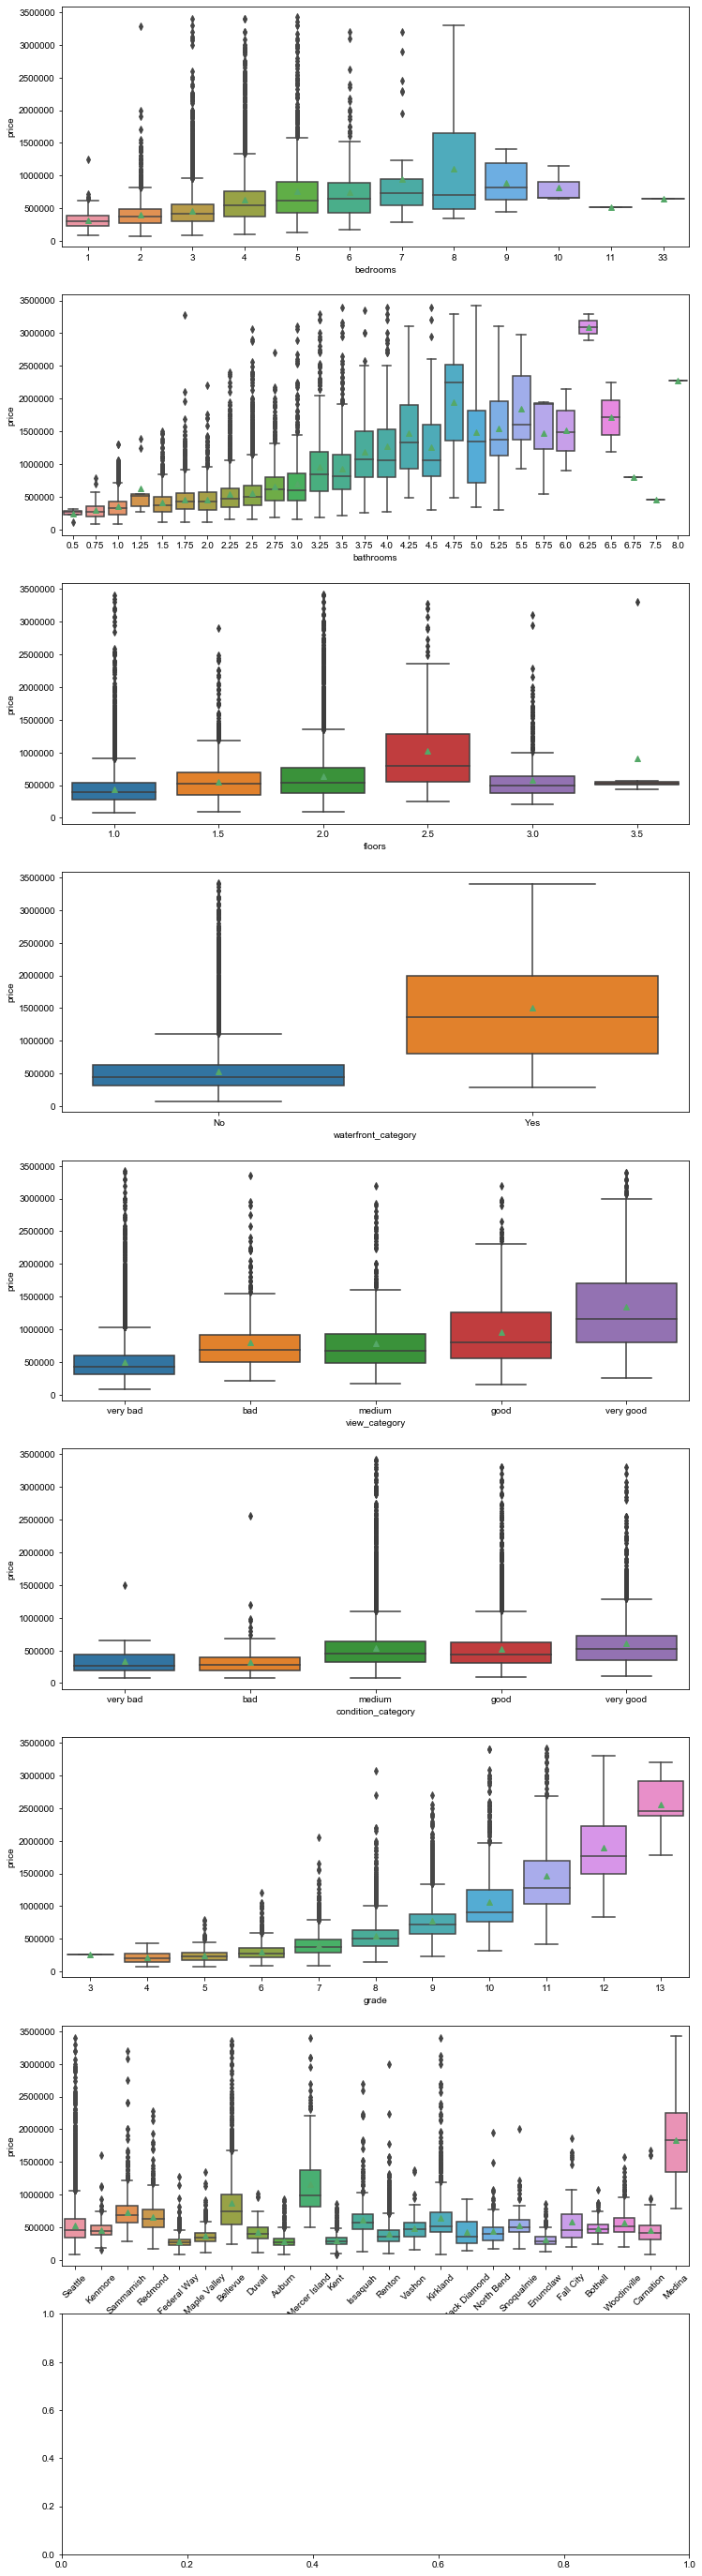

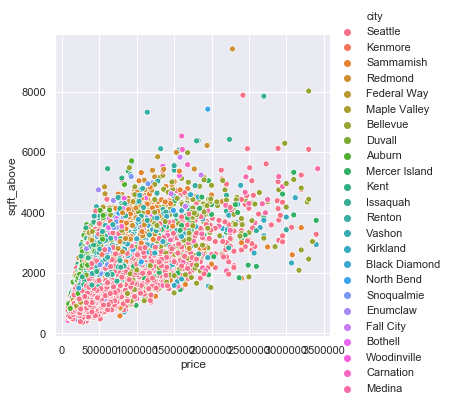

In [52]:
data=data.query("price<3500000")
fig,ax = plt.subplots(9, figsize=(12,50))
sns.boxplot(x='bedrooms', y="price", data=data, showmeans = True, ax=ax[0])
sns.boxplot(x='bathrooms', y="price", data=data, ax=ax[1], showmeans = True)
sns.boxplot(x='floors', y="price", data=data, ax=ax[2], showmeans = True)
sns.boxplot(x='waterfront_category', y="price", data=data, ax=ax[3], showmeans = True)
sns.boxplot(x='view_category', y="price", data=data, ax=ax[4], showmeans = True)
sns.boxplot(x='condition_category', y="price", data=data, ax=ax[5], showmeans = True)
sns.boxplot(x='grade', y="price", data=data, showmeans = True, ax=ax[6])
chart=sns.boxplot(x='city', y="price", data=data, showmeans = True, ax=ax[7])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

* almost all of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price
* The prices are particularly high in Medina, since with an average per capita income of USD 81,742 it is considered extremely wealthy.
* Auburn is home to a number of major companies including Northwest Territorial Mint, ZONES, Toysmith, Timberland Homes, POE construction, Armstrong Construction, Miles Sand and Gravel, Oak Harbor Freight Lines


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


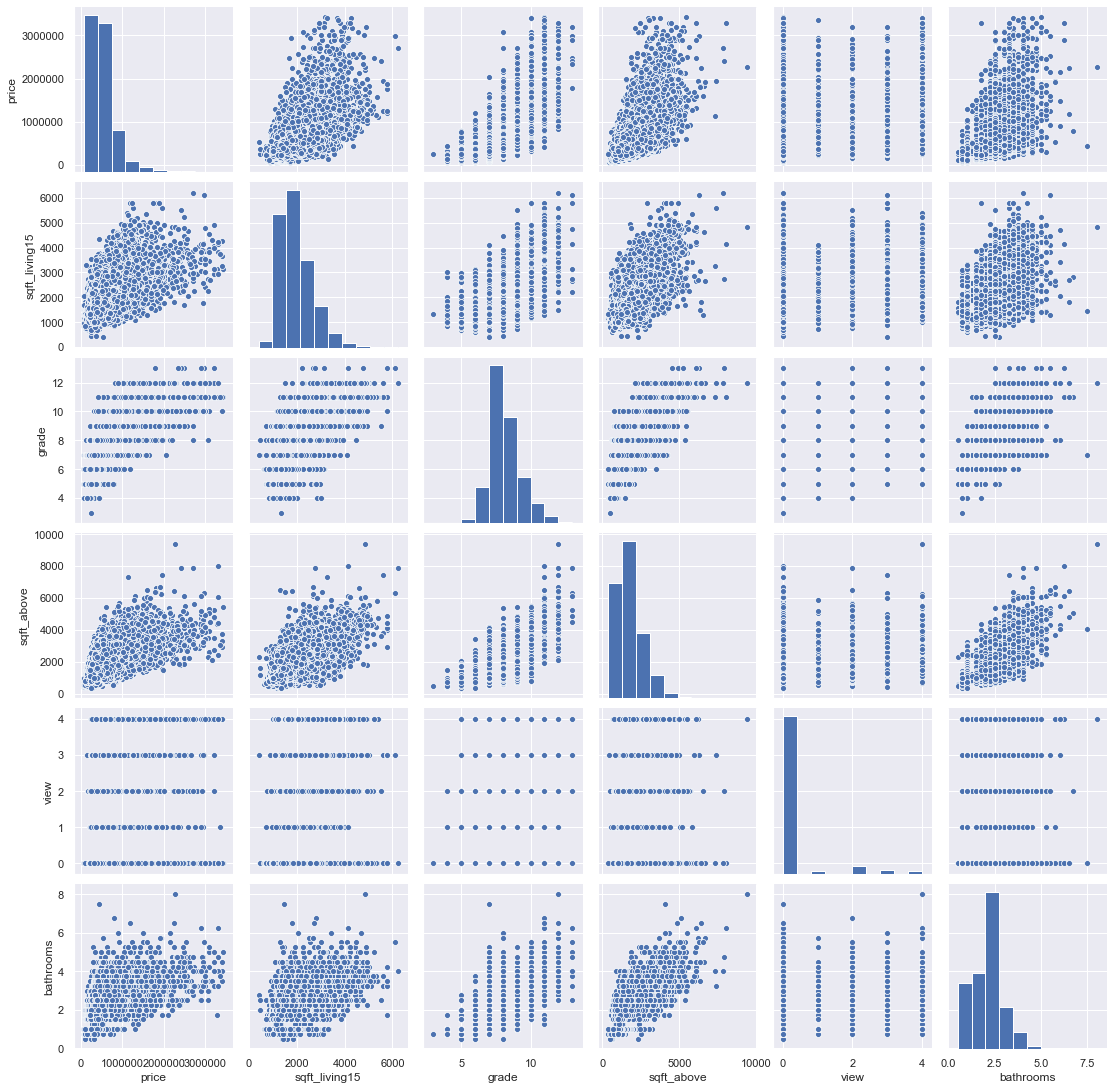

In [101]:
sns.set()
cols = ['price', 'sqft_living15', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show()